# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Own work starts here.
First, import the modules and get some idea of the data in df.
Second, define auxiliary functions.
Third, calculate necessary statistics to answer the questions.
Forth, make necessary plots to support the results.

In [11]:
# Import necessary modules 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Functions definition
To find:
1. Distribution of body temperatures normality
2. Large sample size and independent observations. 
3. True population mean 98.6 F
4. Margin of error (?) and confidence interval.
5. Difference between males and females.

In [6]:

# Computing the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Variables definition to answer the questions
1. temperature in one vector to make the comparison with normal distribution. 
    Calculate the ecdf of temperature and get a theoretical normal with mean and std. 
2. Sample size is high enough (130) and there is no indication to suspect dependency, disease could be an indicator on the contrary. 
3. Since the objective is to compare the population mean with the average, it is appropriate to use a one-sample test.
   Because of the CLT and the sample size the statistic should be z. 
4. The margin of error calculation is 1.43 and the confidence interval at 95% is [96.7225,  99.4775], so 98.6+1.43 = 100.3 would be an abnormal temperature using the margin of error calculation, and 99.5 using a 95% confidence inteval.
5. Considering the normality of the data, the appropriate test is a two sample t-test using unequal variances.


In [18]:
sample_size = len(df)
sample_size

130

In [7]:
temp = df['temperature']

In [9]:
x_temp, y_temp = ecdf(temp)

In [10]:
mean = np.mean(temp)
std = np.std(temp)
samples = np.random.normal(mean, std, size = 10000)


In [14]:
x_theor,y_theor=ecdf(samples)

#### Plotting for normality
Plot the ecdf of temperature and a theoretical normal distribution

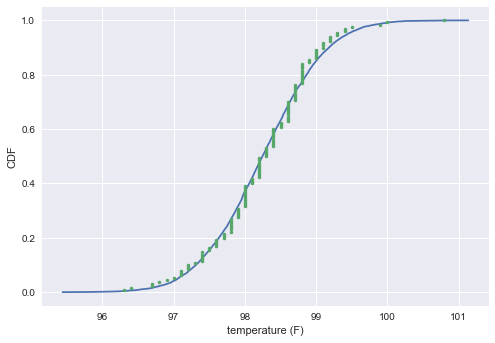

In [43]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp,y_temp, marker = '.', linestyle='none')
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('CDF')
plt.show()


The hypothesis that the population temperature is 98.6 cannot be rejected.

In [19]:
# calculate z statistic
z_stat = (98.6 - mean)/std

In [23]:
from scipy.stats import norm
1 - norm.cdf(z_stat)

0.3155175627927288

Margin of error calculation =
critical value * standard error

In [35]:
import scipy.stats as st
one_tail_cv95 = st.norm.ppf(.975)

In [39]:
margin_error = one_tail_cv95*std
margin_error

1.4314749424825419

Confidence interval

In [41]:
ci_95 = np.percentile(temp,[2.5,97.5])
ci_95

array([ 96.7225,  99.4775])

T-test for difference of means.

In [48]:
# Create variable with TRUE if nationality is USA
male = df['gender'] == "M"

# Select all casess where nationality is USA and age is greater than 50
male_temp = df['temperature'][male]
female_temp = df['temperature'][male == 0]


In [56]:
nm = len(male_temp)
mean_mt = np.mean(male_temp)
std_mt = np.std(male_temp)
std_mt


0.69335988418286987

In [55]:
nf = len(female_temp)
mean_ft = np.mean(female_temp)
std_ft = np.std(female_temp)
std_ft

0.73774644864289662

In [61]:
# standard error and t-test 
std_err = ((std_ft**2)/nf-(std_mt**2)/nm)
t_stat = (mean_mt-mean_ft)/(np.sqrt(std_err))
t_stat

-9.2520815759665052

In [62]:
# degree of freedom
df = ((std_ft**2/nf + std_mt**2/nm)**2)/((((std_ft**2/nf)**2)/(nf-1))+(((std_mt**2/nm)**2)/(nm-1)))

In [63]:
df

127.5103008303909

### Conclusion
We can conclude that the previous temperature is appropriate in the population of interest.